# Análise da diferença salarial para trabalhadores de TI conforme a união federativa (UF) de cada indivíduo.

Aqui é realizado as análises de quantidade de pessoas e diferença salarial entre homens e mulheres
com funções trabalhistas de TI distribuídos em qualquer setor produtivo no Brasil, 
conforme a união federativa (UF) de cada indivíduo em

## Etapas iniciais para realização das análises:

### Imports necessários para realização dos processamentos e análises:

In [8]:
import pandas as pd
import matplotlib.colors as mcl
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
import numpy as np
from mpl_toolkits.axes_grid1 import make_axes_locatable

# Imports de mapas
import geopandas as gpd

# Opções gerais necessárias:
pd.options.display.float_format = "{:,.2f}".format

### Variáveis inicias importantes utilizadas durante a realização dos processamentos e análises:

In [9]:
# Criando indices dos sexos:
sexo = {1: 'Masc.', 2: 'Fem.'}

# Criando indices das raças:
#escol = {5: 'Fundamental Completo', 7: 'Médio Completo', 9: 'Superior Completo', 10: 'Mestrado', 11: 'Doutorado'}

# Variável com o nível de confiança a ser considerado e utilizado:
nivel_confianca = 0.01

# Montagem da paleta de cores utilizadas:
pal = sns.color_palette("pastel")

# Definição das cores para cada sexo (masc: verde pastel, fem: laranja pastel)
color_masc = pal[2]
color_fem = pal[1]

xlim_total_esquerda = -73.98318216
xlim_total_direita = -34.79331171

### Etapa de leitura dos dados das tabelas em CSV e mapa Brasil:

In [10]:
#Leitura da tabela de dados gerais:
RAIS_GERAL_2021 = pd.read_csv("C:/Users/leila/estagio/data/raw/DATA_RAIS_GERAL_2021.csv", sep = ";", encoding = 'utf-8', skipinitialspace = True)

# Renomeando as colunas:
RAIS_GERAL_2021.rename(columns = {'CBO Ocupação 2002':'CBO', 'CNAE 2.0 Classe':'CNAE', 'Escolaridade após 2005':'Escolaridade',
                            'Raça Cor':'Raça', 'Vl Remun Dezembro Nom':'Remuneração', 'Sexo Trabalhador':'Sexo'}, inplace = True)

In [11]:
# Leitura do mapa do Brasil para utilização:
df_br_map = gpd.read_file("C:/Users/leila/estagio/data/shapefiles/lml_unidade_federacao_a.shp")


# Criação da coluna centroid, com o centro de cada polígono (Estado)
df_br_map['centroid'] = df_br_map.centroid


C:\Users\leila\AppData\Local\Temp\ipykernel_11532\1750421478.py:6: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  df_br_map['centroid'] = df_br_map.centroid


In [4]:
'''UF = pd.Series.to_frame(RAIS_GERAL_2021['UF'].value_counts())
UF['qnt_total'] = UF['UF'].astype(object)
del UF['UF']
UF['sigla'] = UF.index
df_br_map = df_br_map.merge(UF, how = 'inner', on = 'sigla')

map_fig = df_br_map.plot(figsize = (16,16))
map_fig.set_axis_off()

df_br_map.apply(lambda x: map_fig.annotate(text=x['qnt_total'], xy=(x['centroid'].coords[0][0],x['centroid'].coords[0][1]), ha='center', bbox = dict(boxstyle="round,pad=.5", fc="0.9")), axis=1)
map_fig'''

'UF = pd.Series.to_frame(RAIS_GERAL_2021[\'UF\'].value_counts())\nUF[\'qnt_total\'] = UF[\'UF\'].astype(object)\ndel UF[\'UF\']\nUF[\'sigla\'] = UF.index\ndf_br_map = df_br_map.merge(UF, how = \'inner\', on = \'sigla\')\n\nmap_fig = df_br_map.plot(figsize = (16,16))\nmap_fig.set_axis_off()\n\ndf_br_map.apply(lambda x: map_fig.annotate(text=x[\'qnt_total\'], xy=(x[\'centroid\'].coords[0][0],x[\'centroid\'].coords[0][1]), ha=\'center\', bbox = dict(boxstyle="round,pad=.5", fc="0.9")), axis=1)\nmap_fig'

### Correção da inflação do período analisado até o atual das remunerações pelo fator de correção INPC (IBGE):

In [12]:
# Foi utilizado o Índice Nacional de Preços ao Consumidor (INPC - IBGE).

# Índice de correção de inflação para o período de 12/2021
# até 09/2023 (fator de correção mais recente no último processamento dos dados).
fator_correcao_inflacao_2021 = 1.01122970

RAIS_GERAL_2021["Remuneração"] = RAIS_GERAL_2021["Remuneração"] * fator_correcao_inflacao_2021

### Exibição da tabela geral:

In [13]:
# Exibindo os cinco primeiros dados da tabela:
RAIS_GERAL_2021.head()

,UF,CBO,CNAE,Escolaridade,Idade,Raça,Remuneração,Sexo
0,MS,317210,85201,1,21,8,"1,372.23",1
1,MS,317210,85201,1,22,9,"1,338.76",1
2,MS,317210,85201,1,20,9,"1,405.69",1
3,MS,212405,72100,1,22,8,"4,550.53",1
4,MS,317205,47717,1,30,8,"5,256.67",1


### Alimentando com dados a tabela do mapa do Brasil:

In [14]:
# Tabela principal para quantidade:
RAIS_GERAL_2021_QNT = pd.crosstab(RAIS_GERAL_2021["UF"], RAIS_GERAL_2021["Sexo"].replace(sexo))
RAIS_GERAL_2021_QNT.reset_index(inplace = True)
RAIS_GERAL_2021_QNT.rename(columns = {'UF':'sigla','Fem.':'qnt_mulheres_2021', 'Masc.':'qnt_homens_2021'}, inplace = True)

RAIS_GERAL_2021_QNT.insert(2, "perc_mulheres_2021", RAIS_GERAL_2021_QNT["qnt_mulheres_2021"] / (RAIS_GERAL_2021_QNT["qnt_mulheres_2021"].sum()) * 100)
RAIS_GERAL_2021_QNT.insert(4, "perc_homens_2021", RAIS_GERAL_2021_QNT["qnt_homens_2021"] / (RAIS_GERAL_2021_QNT["qnt_homens_2021"].sum()) * 100)
df_br_map = df_br_map.merge(RAIS_GERAL_2021_QNT, how = 'inner', on = 'sigla')


In [ ]:
'''print(df_br_map.head())
print(RAIS_GERAL_2021_QNT.head())'''


In [15]:
# Tabela principal para média e diferença salarial:
RAIS_GERAL_2021_MEDIA = pd.crosstab(RAIS_GERAL_2021["UF"], RAIS_GERAL_2021["Sexo"].replace(sexo), values = RAIS_GERAL_2021.Remuneração, aggfunc = 'mean')
RAIS_GERAL_2021_MEDIA.reset_index(inplace = True)
RAIS_GERAL_2021_MEDIA.rename(columns = {'UF':'sigla','Fem.':'salario_medio_mulheres_2021', 'Masc.':'salario_medio_homens_2021'}, inplace = True)
RAIS_GERAL_2021_MEDIA.insert(3, "dif_salarial_media_2021", ((RAIS_GERAL_2021_MEDIA["salario_medio_mulheres_2021"] - RAIS_GERAL_2021_MEDIA["salario_medio_homens_2021"]) / RAIS_GERAL_2021_MEDIA["salario_medio_homens_2021"]) * 100)
df_br_map = df_br_map.merge(RAIS_GERAL_2021_MEDIA, how = 'inner', on = 'sigla')

In [16]:
# Tabela principal para mediana e diferença salarial:
RAIS_GERAL_2021_MEDIANA = pd.crosstab(RAIS_GERAL_2021["UF"], RAIS_GERAL_2021["Sexo"].replace(sexo), values = RAIS_GERAL_2021.Remuneração, aggfunc = 'median')
RAIS_GERAL_2021_MEDIANA.reset_index(inplace = True)
RAIS_GERAL_2021_MEDIANA.rename(columns = {'UF':'sigla','Fem.':'salario_mediano_mulheres_2021', 'Masc.':'salario_mediano_homens_2021'}, inplace = True)
RAIS_GERAL_2021_MEDIANA.insert(3, "dif_salarial_mediano_2021", ((RAIS_GERAL_2021_MEDIANA["salario_mediano_mulheres_2021"] - RAIS_GERAL_2021_MEDIANA["salario_mediano_homens_2021"]) / RAIS_GERAL_2021_MEDIANA["salario_mediano_homens_2021"]) * 100)
df_br_map = df_br_map.merge(RAIS_GERAL_2021_MEDIANA, how = 'inner', on = 'sigla')

## Análise da frequência (quantidade de pessoas) dos dados entre homens e mulheres distribuídos conforme a escolaridade de cada indivíduo:

### Criação das tabelas para relatório e tabela para formação do gráfico:

In [17]:
# Tabela principal para quantidade:
RAIS_GERAL_2021_PERC = pd.crosstab(RAIS_GERAL_2021["UF"], RAIS_GERAL_2021["Sexo"].replace(sexo))

RAIS_GERAL_2021_PERC.insert(2, "% Mulheres 2021", RAIS_GERAL_2021_PERC["Fem."] / (RAIS_GERAL_2021_PERC["Fem."] + RAIS_GERAL_2021_PERC["Masc."]) * 100)
RAIS_GERAL_2021_PERC.insert(3, "% Homens 2021", RAIS_GERAL_2021_PERC["Masc."] / (RAIS_GERAL_2021_PERC["Fem."] + RAIS_GERAL_2021_PERC["Masc."]) * 100)

RAIS_GERAL_2021_PERC.drop('Fem.', inplace=True, axis=1)
RAIS_GERAL_2021_PERC.drop('Masc.', inplace=True, axis=1)

RAIS_GERAL_2021_PERC

Sexo,% Mulheres 2021,% Homens 2021
UF,,
AC,17.68,82.32
AL,14.38,85.62
AM,17.04,82.96
AP,24.14,75.86
BA,18.10,81.90
CE,21.30,78.70
DF,20.98,79.02
ES,19.57,80.43
GO,15.44,84.56


In [18]:
cor_mapa_qnt = mcl.LinearSegmentedColormap.from_list(name = 'Oranges', colors = ['#B1F5D7', '#150E11'], N = 256)

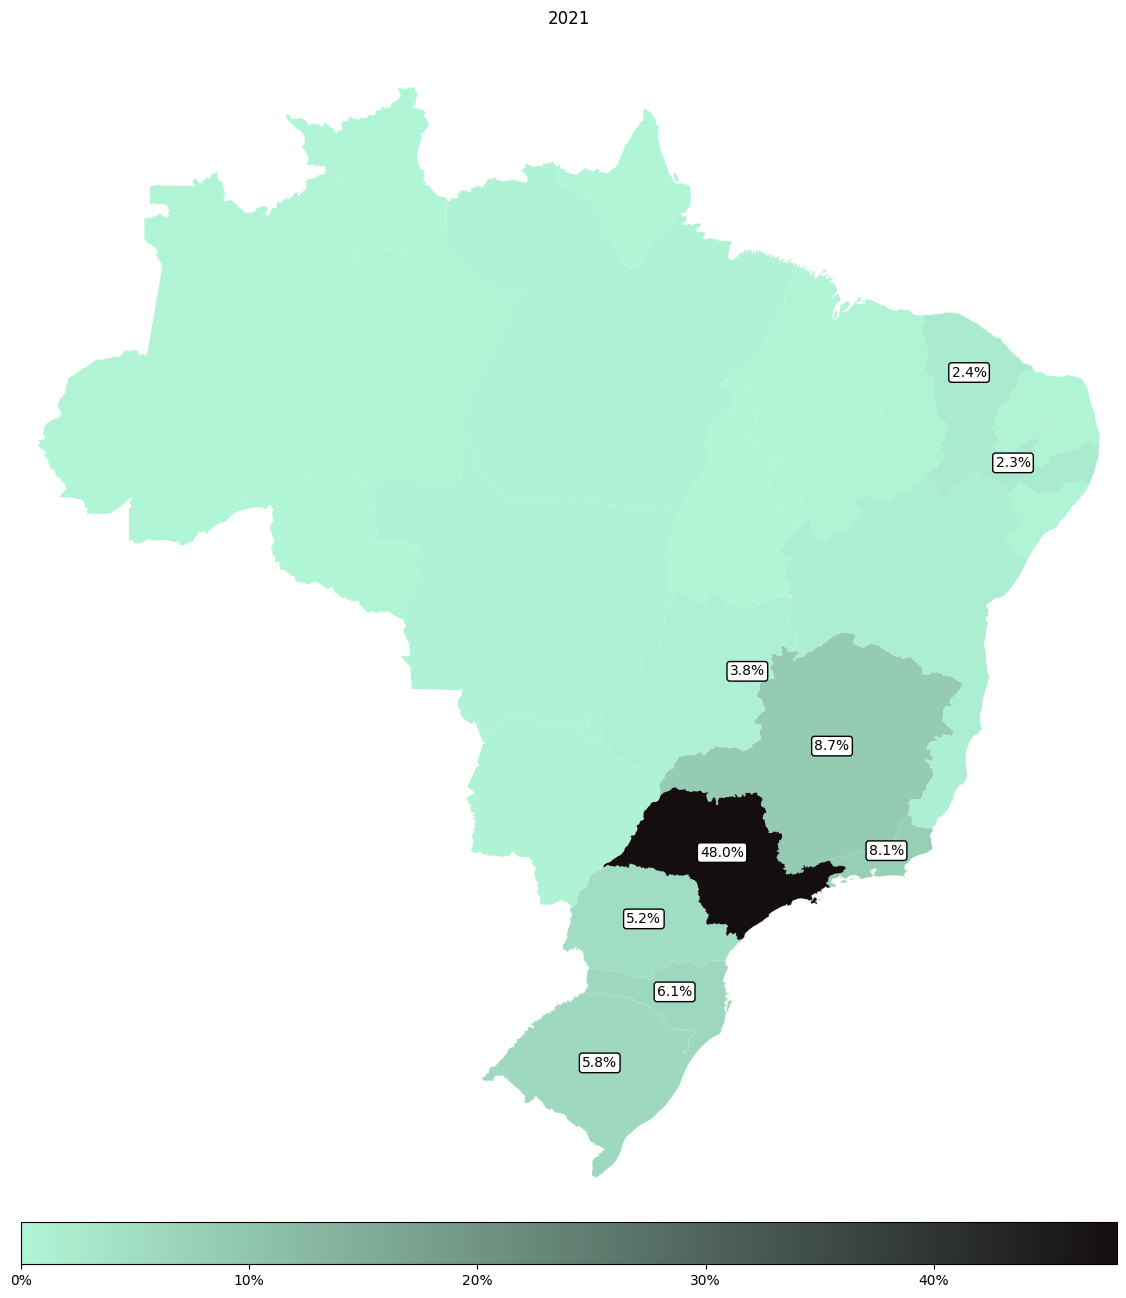

In [19]:
fig, (ax1) = plt.subplots(1, figsize = (16, 16))
fig.subplots_adjust(wspace = 0.05)

ax1.set_xlim(xlim_total_esquerda, xlim_total_direita)

df_br_map.apply(lambda x: ax1.annotate(text = '{:.1f}%'.format(x['perc_mulheres_2021']), 
                                       xy = (x['centroid'].coords[0][0], x['centroid'].coords[0][1]), 
                                       ha='center', bbox = dict(boxstyle = "round,pad = .2", fc = "1")) 
                        if x['perc_mulheres_2021'] >= 2 else '', axis = 1)


df_br_map.plot(cmap = cor_mapa_qnt, column = 'perc_mulheres_2021', ax = ax1)

divider = make_axes_locatable(ax1)
cax1 = divider.append_axes("bottom", size="3.5%", pad=-0.1)
cax1.xaxis.set_ticks_position("bottom")

fig.colorbar(plt.cm.ScalarMappable(cmap = cor_mapa_qnt, 
                                   norm = plt.Normalize(vmin = 0, vmax = df_br_map['perc_mulheres_2021'].max())), 
                                   cax1, orientation = "horizontal", format = lambda x, _: f"{x:.0f}%")

ax1.set_axis_off()

ax1.title.set_text('2021')

fig.savefig("C:/Users/leila/estagio/data/figures/png/map_qnt_mulheres.png", dpi = 300)

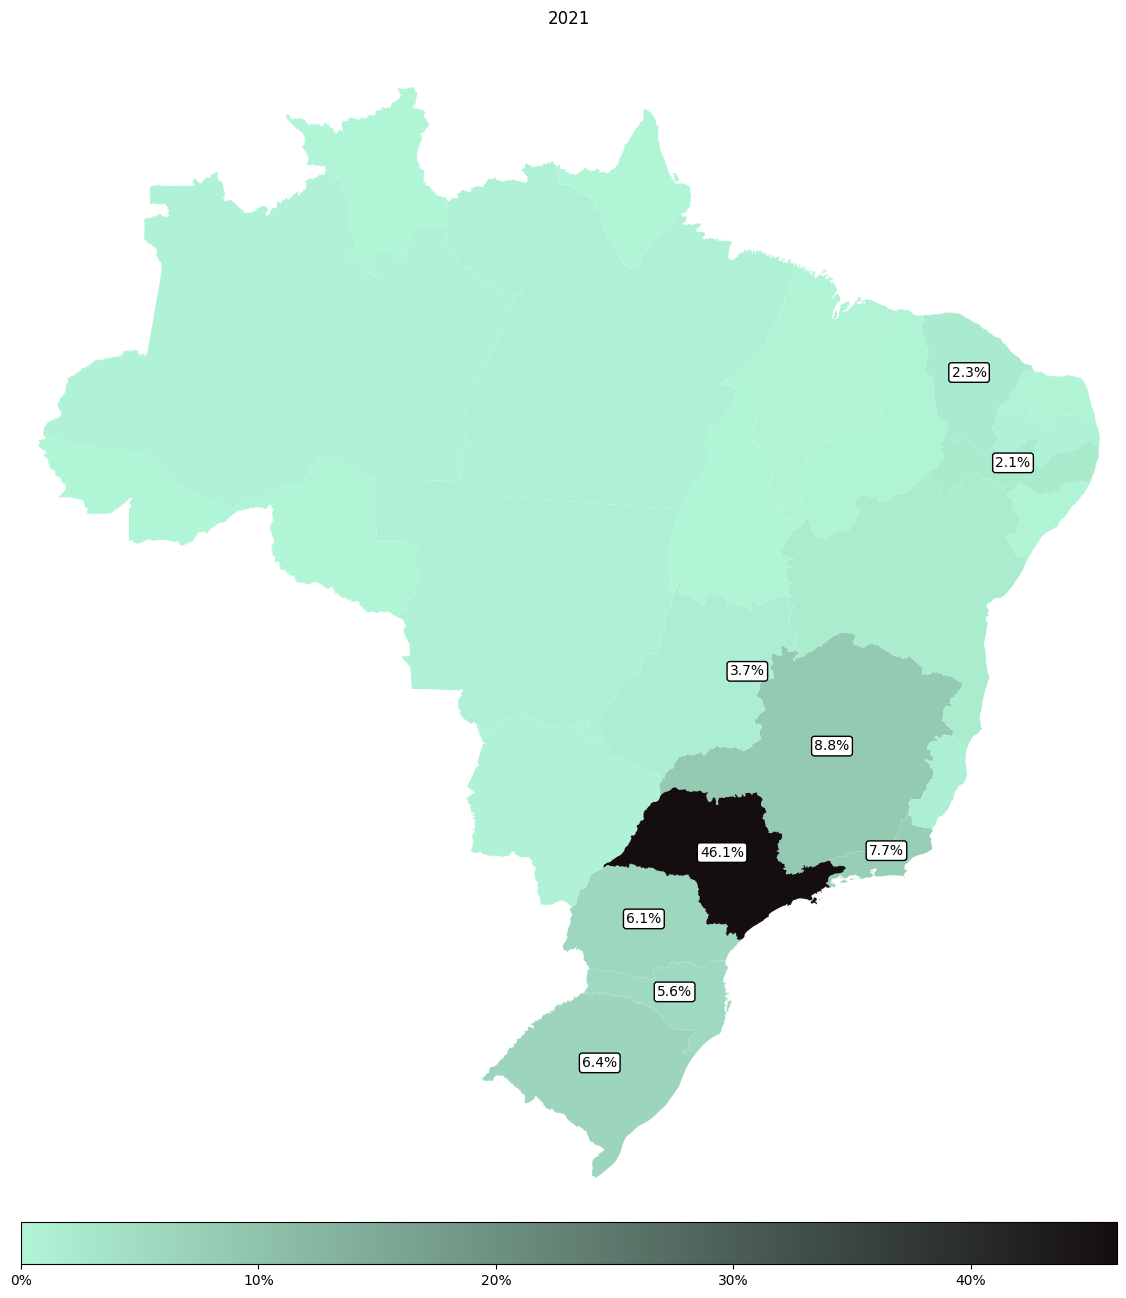

In [20]:
fig, (ax2) = plt.subplots(1, figsize = (16, 16))
fig.subplots_adjust(wspace = 0.05)

ax2.set_xlim(xlim_total_esquerda, xlim_total_direita)

df_br_map.apply(lambda x: ax2.annotate(text = '{:.1f}%'.format(x['perc_homens_2021']), 
                                       xy = (x['centroid'].coords[0][0], x['centroid'].coords[0][1]), 
                                       ha='center', bbox = dict(boxstyle = "round,pad = .2", fc = "1")) 
                        if x['perc_homens_2021'] >= 2 else '', axis = 1)

df_br_map.plot(cmap = cor_mapa_qnt, column = 'perc_homens_2021', ax = ax2)

divider = make_axes_locatable(ax2)
cax2 = divider.append_axes("bottom", size="3.5%", pad=-0.1)

cax2.xaxis.set_ticks_position("bottom")

fig.colorbar(plt.cm.ScalarMappable(cmap = cor_mapa_qnt, 
                                   norm = plt.Normalize(vmin = 0, vmax = df_br_map['perc_homens_2021'].max())), 
                                   cax2, orientation = "horizontal", format=lambda x, _: f"{x:.0f}%")


ax2.set_axis_off()

ax2.title.set_text('2021')

fig.savefig("C:/Users/leila/estagio/data/figures/png/map_qnt_homens.png", dpi = 300)

## Análise das médias salariais e diferenças:

### Teste de hipótese para cada grupo de médias por CBOs:

In [21]:
# Tabela principal para mediana e diferença salarial:
RAIS_GERAL_2021_MEDIANA = pd.crosstab(RAIS_GERAL_2021["UF"], RAIS_GERAL_2021["Sexo"].replace(sexo), values = RAIS_GERAL_2021.Remuneração, aggfunc = 'median')
RAIS_GERAL_2021_MEDIANA.insert(2, "Diferença Salarial", ((RAIS_GERAL_2021_MEDIANA["Fem."] - RAIS_GERAL_2021_MEDIANA["Masc."]) / RAIS_GERAL_2021_MEDIANA["Masc."]) * 100)

RAIS_GERAL_2021_MEDIANA.head()



Sexo,Fem.,Masc.,Diferença Salarial
UF,,,
AC,"2,748.11","3,119.24",-11.90
AL,"2,720.79","2,629.20",3.48
AM,"4,497.59","4,732.51",-4.96
AP,"1,999.21","2,224.71",-10.14
BA,"3,021.04","3,034.60",-0.45


In [22]:
RAIS_GERAL_2021_MEDIANA["Ano"] = "2021"

In [23]:
def teste_hipotese(first_data, second_data, confidence_interval):
    from scipy.stats import mannwhitneyu 
    
    stat, p_valor = mannwhitneyu(first_data, second_data, alternative = 'less')
    
    if p_valor <= confidence_interval:
        return stat, p_valor, 'Medianas estatisticamente diferentes', ''
    else:
        return stat, p_valor, 'Medianas estatisticamente iguais', '*'

In [24]:
TESTE_HIP_2021 = pd.DataFrame(columns = ['Estat. Mann-Whitney', 'pValor', 'Resultado Estat.', 'sigla', 'result_estat'])

list_uf = RAIS_GERAL_2021['UF'].value_counts().index.to_list()

for uf in list_uf:
    df1 = RAIS_GERAL_2021.query("Sexo == 1").query("UF == '{}'".format(uf)).Remuneração
    df2 = RAIS_GERAL_2021.query("Sexo == 2").query("UF == '{}'".format(uf)).Remuneração

    mean1 = df1.median()
    mean2 = df2.median()

    if mean1 < mean2:
        stat, p, result, result_estat = teste_hipotese(df1, df2, nivel_confianca)
    else:
        stat, p, result, result_estat = teste_hipotese(df2, df1, nivel_confianca)
    
    TESTE_HIP_2021.loc[uf] = [str(stat), '0.01 > {:.5f}...'.format(p), result, uf, result_estat]

RAIS_GERAL_2021_HIP = pd.merge(RAIS_GERAL_2021_MEDIANA, TESTE_HIP_2021, left_index=True, right_index=True)
RAIS_GERAL_2021_HIP.drop('Diferença Salarial', inplace=True, axis=1)
RAIS_GERAL_2021_HIP.drop('Ano', inplace=True, axis=1)

RAIS_GERAL_2021_HIP.head(30)

,Fem.,Masc.,Estat. Mann-Whitney,pValor,Resultado Estat.,sigla,result_estat
AC,"2,748.11","3,119.24",9227.0,0.01 > 0.00600...,Medianas estatisticamente diferentes,AC,
AL,"2,720.79","2,629.20",304526.5,0.01 > 0.10439...,Medianas estatisticamente iguais,AL,*
AM,"4,497.59","4,732.51",1489853.5,0.01 > 0.01915...,Medianas estatisticamente iguais,AM,*
AP,"1,999.21","2,224.71",23052.0,0.01 > 0.06287...,Medianas estatisticamente iguais,AP,*
BA,"3,021.04","3,034.60",11673588.5,0.01 > 0.11791...,Medianas estatisticamente iguais,BA,*
CE,"2,528.07","3,272.99",18278497.0,0.01 > 0.00000...,Medianas estatisticamente diferentes,CE,
DF,"8,697.00","8,279.44",53593081.0,0.01 > 0.09123...,Medianas estatisticamente iguais,DF,*
ES,"3,287.88","3,969.47",6471505.5,0.01 > 0.00000...,Medianas estatisticamente diferentes,ES,
GO,"2,880.82","3,454.46",5495079.0,0.01 > 0.00000...,Medianas estatisticamente diferentes,GO,
MA,"1,719.09","2,318.00",491526.0,0.01 > 0.00000...,Medianas estatisticamente diferentes,MA,


In [25]:
# Tabela principal para teste estatistico :
RAIS_GERAL_2021_HIP.reset_index(inplace = True)
RAIS_GERAL_2021_HIP.drop('Fem.', inplace=True, axis=1)
RAIS_GERAL_2021_HIP.drop('Masc.', inplace=True, axis=1)
RAIS_GERAL_2021_HIP.drop('Estat. Mann-Whitney', inplace=True, axis=1)
RAIS_GERAL_2021_HIP.drop('pValor', inplace=True, axis=1)
RAIS_GERAL_2021_HIP.drop('Resultado Estat.', inplace=True, axis=1)
RAIS_GERAL_2021_HIP.drop('index', inplace=True, axis=1)
RAIS_GERAL_2021_HIP.rename(columns = {'result_estat':'result_estat_2021'}, inplace = True)
df_br_map = df_br_map.merge(RAIS_GERAL_2021_HIP, how = 'inner', on = 'sigla')

### Criação dos mapas com as diferenças salariais medianas:

In [26]:
cor_mapa_dif_2021 = mcl.LinearSegmentedColormap.from_list(name = 'Oranges2', colors = ['#B1F5D7', '#A5E6CA', '#150E11'], N = 256)

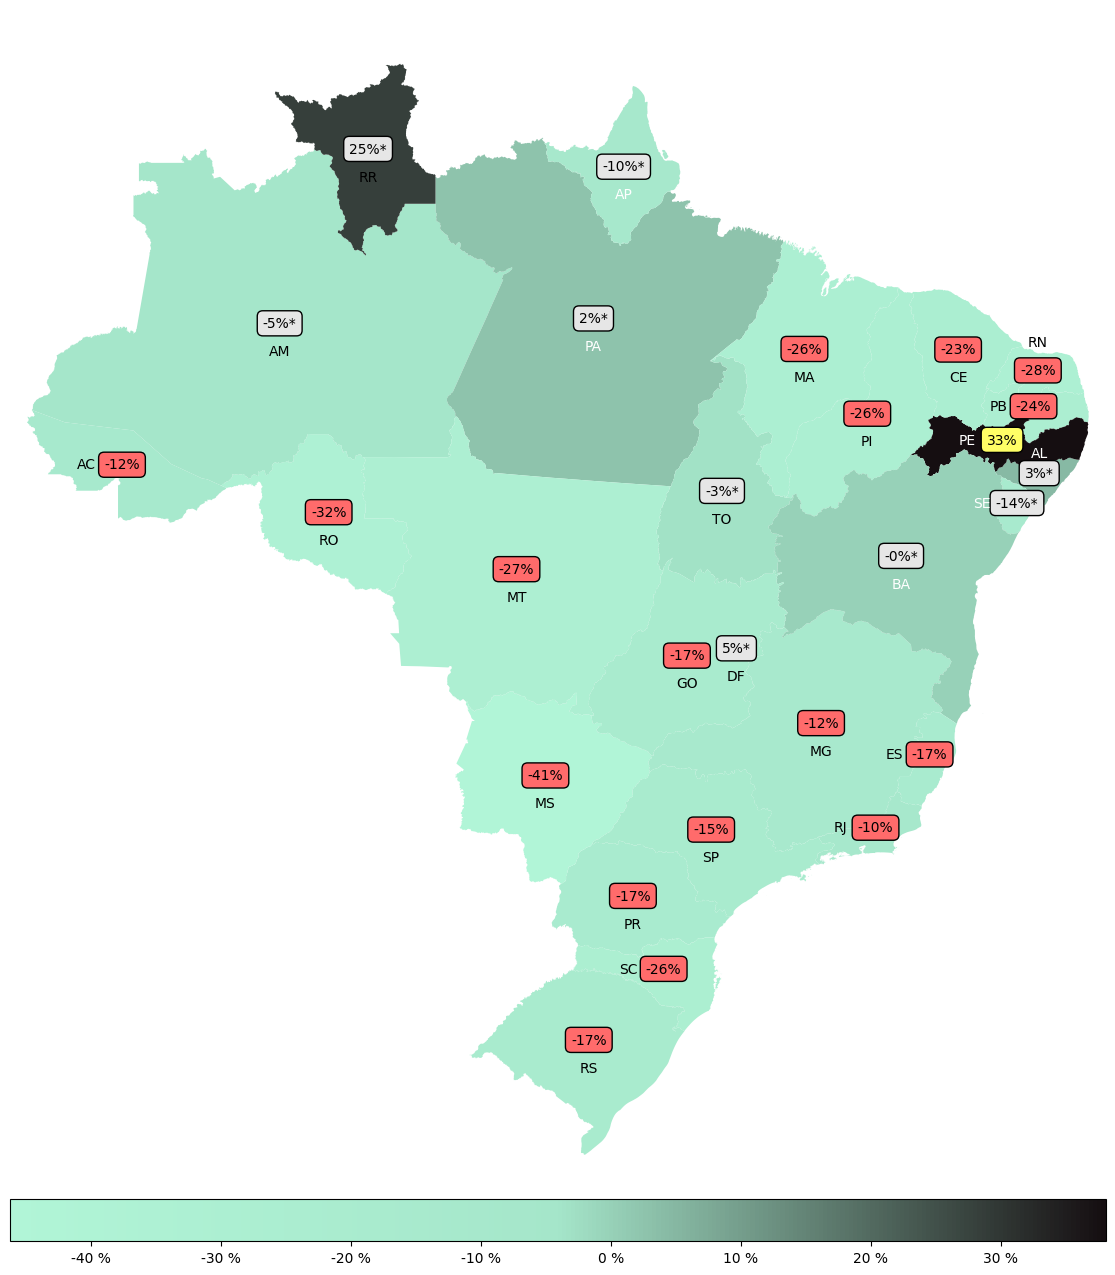

In [27]:
fig, ax = plt.subplots(1, 1, figsize = (20, 16))

ax.set_xlim(xlim_total_esquerda, xlim_total_direita)

df_br_map.apply(lambda x: ax.annotate(text = '{:.0f}%{}'.format(x['dif_salarial_mediano_2021'], x['result_estat_2021']), 
                                       xy = (x['centroid'].coords[0][0], x['centroid'].coords[0][1]), 
                                       ha='center', bbox = dict(boxstyle = "round,pad = .4", fc="0.9"))
                        if x['result_estat_2021'] == '*' else
                                ax.annotate(text = '{:.0f}%{}'.format(x['dif_salarial_mediano_2021'], x['result_estat_2021']), 
                                            xy = (x['centroid'].coords[0][0], x['centroid'].coords[0][1]), 
                                            ha='center', bbox = dict(facecolor = '#FFFE66', boxstyle = "round,pad = .4"))
                        if x['dif_salarial_mediano_2021'] >= 0 else 
                                ax.annotate(text = '{:.0f}%{}'.format(x['dif_salarial_mediano_2021'], x['result_estat_2021']), 
                                            xy = (x['centroid'].coords[0][0], x['centroid'].coords[0][1]), 
                                            ha='center', bbox = dict(facecolor = '#FF6B6B', boxstyle = "round,pad = .4"))
                , axis = 1)

df_br_map.plot(cmap = cor_mapa_dif_2021, column = 'dif_salarial_mediano_2021', ax = ax)

divider = make_axes_locatable(ax)
cax = divider.append_axes("bottom", size="3.5%", pad=-0.1)
cax.xaxis.set_ticks_position("bottom")

fig.colorbar(plt.cm.ScalarMappable(cmap = cor_mapa_dif_2021, 
                                   norm = plt.Normalize(vmin = df_br_map['dif_salarial_mediano_2021'].min()-5, vmax = df_br_map['dif_salarial_mediano_2021'].max()+5)), 
                                   cax, orientation = "horizontal", format = lambda x, _: f"{x:.0f} %")

ax.set_axis_off()

df_br_map.apply(lambda x: ax.annotate(text = '{}'.format(x['sigla']), 
                                       xy = (x['centroid'].coords[0][0]-1.3, x['centroid'].coords[0][1]), 
                                       ha='center', color = 'white')
                        if ((x['sigla'] == 'SE') | (x['sigla'] == 'PE')) else
                                ax.annotate(text = '{}'.format(x['sigla']), 
                                       xy = (x['centroid'].coords[0][0]-1.3, x['centroid'].coords[0][1]), 
                                       ha='center', color = 'black')
                        if ((x['sigla'] == 'AC') | (x['sigla'] == 'RJ') | (x['sigla'] == 'ES') |
                            (x['sigla'] == 'PB') | (x['sigla'] == 'SC')) else
                                ax.annotate(text = '{}'.format(x['sigla']), 
                                       xy = (x['centroid'].coords[0][0], x['centroid'].coords[0][1]+.7), 
                                       ha='center', color = 'white')
                        if (x['sigla'] == 'AL') else
                                ax.annotate(text = '{}'.format(x['sigla']), 
                                       xy = (x['centroid'].coords[0][0], x['centroid'].coords[0][1]+1), 
                                       ha='center', color = 'black')
                        if ((x['sigla'] == 'RN')) else
                                ax.annotate(text = '{}'.format(x['sigla']), 
                                       xy = (x['centroid'].coords[0][0], x['centroid'].coords[0][1]-1), 
                                       ha='center', color = 'black')
                        if ((x['sigla'] == 'RR') | (x['sigla'] == 'MS')) else
                                ax.annotate(text = '{}'.format(x['sigla']), 
                                       xy = (x['centroid'].coords[0][0], x['centroid'].coords[0][1]-1), 
                                       ha='center', color = 'white')
                        if ((x['sigla'] == 'PA') | (x['sigla'] == 'BA') | (x['sigla'] == 'AP')) else
                                ax.annotate(text = '{}'.format(x['sigla']), 
                                       xy = (x['centroid'].coords[0][0], x['centroid'].coords[0][1]-1), 
                                       ha='center', color = 'black')
                                       , axis = 1)

fig.savefig("C:/Users/leila/estagio/data/figures/png/map_dif_mediana_2021.png", dpi = 300)